Os dados do arquivo Brain, em anexo, referem-se ao peso do cérebro (g), tamanho da cabeça (cm3) de 237 adultos, identificados por sexo e grupo etário. O estudo teve por objetivo verificar se:

1) Há diferença no peso cerebral entre os sexos? E entre os grupos etários? ([TESTE DE HIPÓTESE] H0: há diferença / Ha: não há diferença)

2) O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários? (Regressão Linear)

3) Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar). (estimação de parâmetros)

Interprete seus resultados e verifique se as suposições dos métodos são adequadas a estes dados.

Se uma das suas respostas (aos itens 1, 2 ou 3) aplicar, além da estatística clássica, também a bayesiana (de maneira adequada, claro), sua nota será acrescida de 1 ponto (ou seja, sua prova fica valendo 11 pontos).

### iMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### LEITURA DO ARQUIVO E AJUSTE NAS COLUNAS

In [2]:
# LEITURA DO ARQUIVO "BRAIN.CSV"
brain = pd.read_csv('Brain.csv')
# AJUSTE NO NOME DAS COLUNAS PARA MINUSCULO
brain.columns = map(str.lower, brain.columns)

### CRIAÇÃO DE NOVAS FEATURES 

In [3]:
# CRIAÇÃO DE NOVA COLUNA COM A SEGMENTAÇÃO DA IDADE PELO SEXO MASCULINO
brain['homem_acima45'] = [1 if age == 1 and men == 1 else 0 for age, men in zip(brain['acima45'], brain['homem'])]

# CRIAÇÃO DE NOVA COLUNA COM A IDENTIFICAÇÃO DO SEXO FEMININO
brain['mulher'] = [1 if woman == 0 else 0 for woman in brain['homem']]

# CRIAÇÃO DE NOVA COLUNA COM A IDENTIFICAÇÃO GENERO
brain['genero'] = ['F' if gender == 0 else 'M' for gender in brain['homem']]

# CRIAÇÃO DE NOVA COLUNA COM A SEGMENTAÇÃO DA IDADE PELO SEXO FEMININO
brain['mulher_acima45'] = [1 if age == 1 and woman == 1 else 0 for age, woman in zip(brain['acima45'], brain['mulher'])]

# AJUSTE NA ORDEM DAS COLUNAS
brain = brain.reindex(columns=['homem', 'homem_acima45', 'mulher', 'mulher_acima45', 'genero', 'tamanho', 'peso', 'acima45'])

In [9]:
brain.head()

,homem,homem_acima45,mulher,mulher_acima45,genero,tamanho,peso,acima45
0,1,0,0,0,M,4512,1530,0
1,1,0,0,0,M,3738,1297,0
2,1,0,0,0,M,4261,1335,0
3,1,0,0,0,M,3777,1282,0
4,1,0,0,0,M,4177,1590,0


### ANÁLISE DESCRITIVA DOS VALORES DAS COLUNAS "TAMANHO" E "PESO"

In [ ]:
ra

In [4]:
brain[['tamanho', 'peso']].describe()

,tamanho,peso
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


### VISUALIZAÇÃO DA DISTRIBUIÇÃO E CORRELAÇÃO ENTRE AS VARIÁVEIS "TAMANHO" E "PESO"

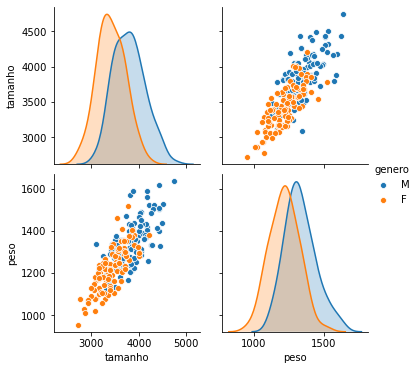

In [5]:
sns.pairplot(brain, vars=['tamanho', 'peso'], hue='genero');

1) Há diferença no peso cerebral entre os sexos? E entre os grupos etários? ([TESTE DE HIPÓTESE] H0: há diferença / Ha: não há diferença)

# COMENTÁRIOS
## VALTER
- t-student: antes avalia se a distribuição é normal e depois compara as distribuição
- shapiro-test
- p-valor

---

## SANDY
- verificar se são independentes (teste de Pearson)
- se tem distribuição normal (q-q plot / shapiro)
- tem variâncias iguais (levene)<br>
-> depois disso t-student<br>

Teste T-Student bicaudal

In [59]:
homem_peso =  np.array(brain.loc[brain['homem']==1, 'peso'])
mulher_peso =  np.array(brain.loc[brain['mulher']==1, 'peso'])

acima45_peso =  np.array(brain.loc[brain['acima45']==1, 'peso'])
abaixo45_peso =  np.array(brain.loc[brain['acima45']==0, 'peso'])

## Hipóteses:

**H0**: *NÃO HÁ* diferença entre os pesos cerebrais entre os sexos<br>
**Ha**: *HÁ* diferença entre os pesos cerebrais entre os sexos

In [24]:
from scipy import stats


Descritiva do Peso - Homem

In [63]:
brain.loc[brain['homem']==1, 'peso'].describe()

count     134.000000
mean     1331.858209
std       108.933390
min      1120.000000
25%      1252.750000
50%      1313.500000
75%      1400.000000
max      1635.000000
Name: peso, dtype: float64

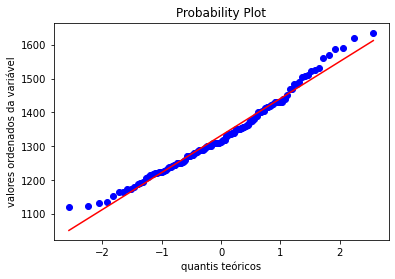

In [35]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(homem_peso, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('valores ordenados da variável')
plt.show()

In [54]:
alpha = 0.05
_, p_value = stats.shapiro(homem_peso)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que a distribuição é Normal.')
else:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que a distribuição NÃO é Normal.')

Com p_valor de 0.029 assumimos que a distribuição NÃO é Normal.


Descritiva do Peso - Mulher

In [62]:
brain.loc[brain['mulher']==1, 'peso'].describe()

count     103.000000
mean     1219.145631
std       103.829933
min       955.000000
25%      1146.000000
50%      1220.000000
75%      1290.000000
max      1520.000000
Name: peso, dtype: float64

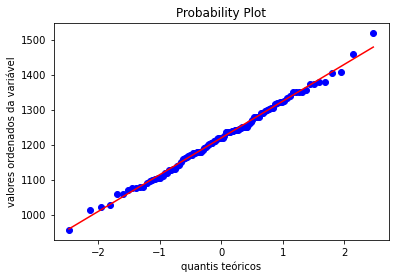

In [31]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(mulher_peso, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('valores ordenados da variável')
plt.show()

In [37]:
alpha = 0.05
_, p_value = stats.shapiro(mulher_peso)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que a distribuição é Normal.')
else:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que a distribuição NÃO é Normal.')

Com p_valor de 0.992 assumimos que a distribuição é Normal.


Testes de Variância

In [39]:
_, p_value = stats.levene(homem_peso, mulher_peso)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que as Amostras possuem a mesma Variância.')
else:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que as Amostras NÃO possuem a mesma Variância.')

Com p_valor de 0.767 assumimos que as Amostras possuem a mesma Variância.


Teste de Indenpendencia

In [40]:
_, p_value = stats.pearsonr(homem_peso, mulher_peso)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que as Amostras são Independentes.')
else:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que as Amostras NÃO são Independentes.')

ValueError: x and y must have the same length.

In [45]:
s_homem_peso = np.random.choice(homem_peso, 100)
s_mulher_peso = np.random.choice(mulher_peso, 100)

_, p_value = stats.pearsonr(s_homem_peso, s_mulher_peso)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que as Amostras são Independentes.')
else:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que as Amostras NÃO são Independentes.')

Com p_valor de 0.306 assumimos que as Amostras são Independentes.


Teste de Hipóteses - Sexo

In [58]:
_, p_value = stats.ttest_ind(homem_peso, mulher_peso, equal_var = True)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 5)} assumimos que NÃO HÁ diferença entre os pesos cerebrais entre os sexos.')
else:
    print(f'Com p_valor de {round(p_value, 5)} assumimos que HÁ diferença entre os pesos cerebrais entre os sexos.')

Com p_valor de 0.0 assumimos que HÁ diferença entre os pesos cerebrais entre os sexos.


### TESTE PARA A FAIXA ETÁRIA

#### acima 45

In [61]:
brain.loc[brain['acima45']==1, 'peso'].describe()

count     127.000000
mean     1263.937008
std       120.925712
min       955.000000
25%      1180.000000
50%      1250.000000
75%      1332.500000
max      1620.000000
Name: peso, dtype: float64

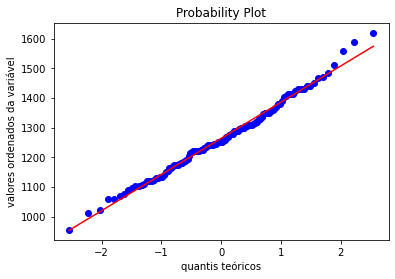

In [64]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(acima45_peso, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('valores ordenados da variável')
plt.show()

In [66]:
alpha = 0.05
_, p_value = stats.shapiro(acima45_peso)

if p_value > alpha:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que a distribuição é Normal.')
else:
    print(f'Com p_valor de {round(p_value, 3)} assumimos que a distribuição NÃO é Normal.')

Com p_valor de 0.655 assumimos que a distribuição é Normal.


#### abaixo 45